# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

#### **Importing Libraries**

In [1]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


#### Load the preprocessed dataset

In [15]:
# Loading the 2023 FIES Dataset Volume 2
final_fies = pd.read_csv('../../data/processed/final_fies.csv')


In [16]:
final_fies

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR,SOCIAL_CLASS
0,13,39,105930,3900,4.0,352200,0,352200,0,0,0,0,0,0,0,0,0,2276.0,0,0,0,0,0,0,0,0,0,0,0,0,27979.0,30420.0,16640.0,2020.0,4620.0,3340.0,8710.0,1595.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,105759.0,81565.0,187324.0,2370,36660,0,15000,3000,18000,2674,1860,6344,8200,0,0,8166,7122,0,0,0,900,0,73396.0,369476.0,260720.0,261620.0,5000,374476.0,2151,405.804138,1479.726685,1,92369.000000,7,4,5,5,4,13,Low income
1,13,39,105931,3900,5.5,219760,0,219760,0,60000,0,80000,0,0,0,0,0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,39031.0,24925.0,18200.0,8900.0,1565.0,4640.0,10450.0,660.0,1685.0,0.0,3215.0,0.0,0.0,1690.0,0.0,0.0,0.0,9200.0,0.0,0,0,114961.0,114000.0,228961.0,2650,70440,0,37800,0,37800,5510,21595,3720,13660,5080,0,0,14996,0,500,0,0,0,147351.0,398060.0,376312.0,376312.0,40000,438060.0,2151,405.804138,2034.624191,1,72374.546875,6,3,3,3,3,13,Lower-middle income
2,13,39,105932,3900,2.0,0,0,0,0,0,6000,0,0,0,0,0,0,500.0,0,0,0,0,156000,0,0,0,0,0,156000,0,20289.0,17320.0,8450.0,1630.0,1565.0,1430.0,22425.0,2085.0,2490.0,0.0,5475.0,0.0,0.0,2470.0,0.0,0.0,0.0,0.0,0.0,0,0,85629.0,10400.0,96029.0,2730,37380,6000,12000,0,18000,4742,1690,6500,5200,100,150,0,6654,0,1500,0,10000,0,66646.0,174500.0,162675.0,172675.0,8000,182500.0,2151,405.804138,739.863342,1,87250.000000,7,4,4,4,4,13,Poor
3,13,39,105933,3900,7.5,338800,0,338800,0,0,1000,0,0,0,0,0,0,200.0,0,0,0,0,0,0,84000,0,0,0,84000,0,37285.0,37050.0,31200.0,5125.0,1500.0,5230.0,5800.0,1055.0,3420.0,0.0,10956.0,0.0,0.0,1560.0,455.0,0.0,0.0,1840.0,0.0,0,0,140636.0,161600.0,302236.0,960,69760,0,48000,0,48000,3300,300,5668,7800,1820,0,0,14956,0,1100,0,5000,0,107504.0,472000.0,409740.0,414740.0,7500,479500.0,2151,405.804138,2774.487534,1,62933.332031,5,2,2,2,2,13,Lower-middle income
4,13,39,105934,3900,11.0,471720,0,471720,0,0,6600,0,0,0,0,0,0,0.0,0,0,0,0,312000,0,0,0,0,0,312000,0,53135.0,40040.0,50160.0,8610.0,2145.0,3510.0,17290.0,2857.0,2495.0,0.0,10950.0,0.0,0.0,3380.0,0.0,0.0,9360.0,0.0,0.0,0,0,194572.0,238080.0,432652.0,2200,61940,0,30000,0,30000,6118,1800,39000,15600,0,0,5826,17400,0,6000,4500,60900,0,169744.0,820320.0,602396.0,663296.0,55000,875320.0,2151,405.804138,4069.248383,1,74574.546875,6,3,3,3,3,13,Lower-middle income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19487,13,76,126615,7607,5.0,249360,0,249360,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,166500,0,0,0,166500,0,28555.0,21406.0,12900.0,16920.0,2820.0,1870.0,3640.0,1675.0,2830.0,0.0,3042.0,0.0,0.0,2600.0,870.0,0.0,5100.0,2600.0,0.0,0,0,99128.0,30700.0,129828.0,2410,105940,0,72000,0,72000,10174,5250,14300,12374,75,0,10800,16155,0,0,2000,3800,0,187178.0,487860.0,317006.0,320806.0,0,487860.0,780,216.904846,977.090073,1,97572.000000,7,5,4,5,5,13,Low income
19488,13,76,126616,7607,1.0,215720,0,215720,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,12363.0,6280.0,4070.0,1050.0,336.0,725.0,840.0,150.0

In [17]:
# Define the correct order for SOCIAL_CLASS
final_fies['SOCIAL_CLASS'] = pd.Categorical(
    final_fies['SOCIAL_CLASS'], 
    categories=['Poor', 'Low income', 'Lower-middle income', 'Middle income'], 
    ordered=True
)

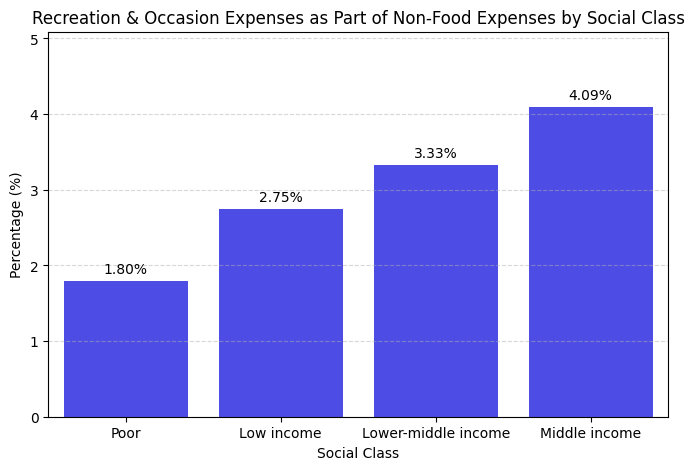

In [18]:
# Group by social class and calculate mean percentage of recreation expenses
recreation_percentages = final_fies.groupby('SOCIAL_CLASS', observed=True).apply(
    lambda x: ((x['RECREATION'] + x['OCCASION']) / x['NFOOD']).mean() * 100,
    include_groups=False
)

# Bar plot for better visualization of small percentages
plt.figure(figsize=(8, 5))
sns.barplot(x=recreation_percentages.index, y=recreation_percentages.values, color='blue', alpha=0.8)

# Add percentage labels for clarity
for i, v in enumerate(recreation_percentages.values):
    plt.text(i, v + 0.1, f'{v:.2f}%', ha='center')

plt.title('Recreation & Occasion Expenses as Part of Non-Food Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, max(recreation_percentages.values) + 1)  # Adjust y-axis for better visibility
plt.show()


-The bar chart illustrates the proportion of Recreation & Occasion expenses relative to total Non-Food (NFOOD) expenses across different social classes.

-Poor households allocate the smallest percentage (1.80%) of their non-food budget to recreation and special occasions.

-As income increases, the proportion spent on these activities rises, reaching 4.09% for the Middle-income group.

-This suggests that higher-income groups have more flexibility to spend on leisure and celebrations, whereas lower-income groups prioritize essential non-food needs.

C:\Users\Judiciel Cruz\AppData\Local\Temp\ipykernel_15416\2607585805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_recreation_expense = final_fies.groupby('SOCIAL_CLASS')[['RECREATION', 'OCCASION']].mean().reset_index()


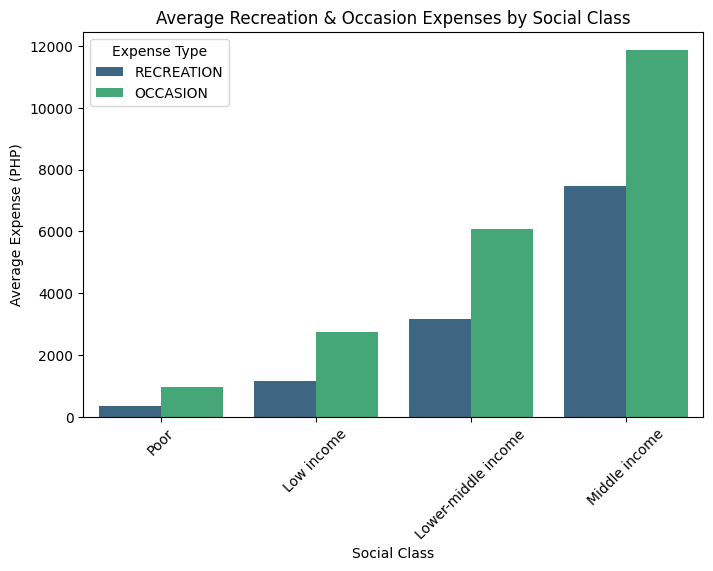

In [19]:
# Compute average recreation & occasion expenses by social class
avg_recreation_expense = final_fies.groupby('SOCIAL_CLASS')[['RECREATION', 'OCCASION']].mean().reset_index()
order = ['Poor', 'Low income', 'Lower-middle income', 'Middle income']

# Melt the dataframe for grouped bar plot
avg_recreation_expense = avg_recreation_expense.melt(id_vars='SOCIAL_CLASS', var_name='Expense Type', value_name='Average Expense')

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(
    x='SOCIAL_CLASS',
    y='Average Expense',
    hue='Expense Type',
    data=avg_recreation_expense,
    palette='viridis',
    order=order
)

plt.title('Average Recreation & Occasion Expenses by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Average Expense (PHP)')
plt.xticks(rotation=45)
plt.legend(title='Expense Type')
plt.show()


-This grouped bar chart displays the average recreation and occasion expenses across different social classes.

-Both expense categories (Recreation & Occasion) increase as income level rises.

-The Middle-income group spends the most on both categories, with Occasion expenses surpassing Recreation.

-The Poor social class has the lowest spending, reflecting limited discretionary income for leisure and celebrations.

-The trend suggests that higher-income groups prioritize social and recreational activities more than lower-income groups.

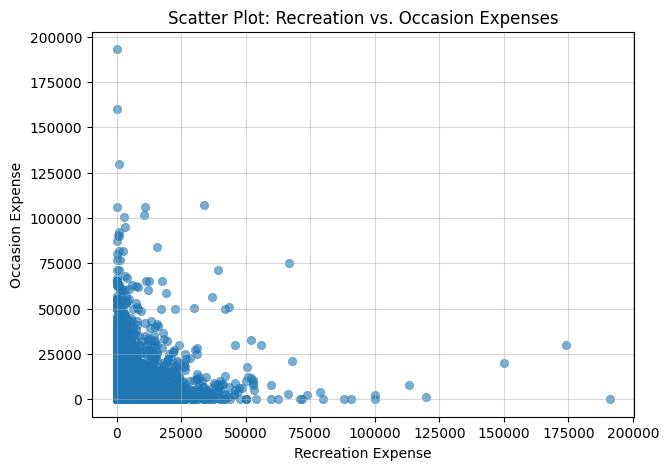

In [20]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=final_fies['RECREATION'],
    y=final_fies['OCCASION'],
    alpha=0.6,
    edgecolor=None
)

plt.title('Scatter Plot: Recreation vs. Occasion Expenses')
plt.xlabel('Recreation Expense')
plt.ylabel('Occasion Expense')
plt.grid(alpha=0.5)
plt.show()

-This scatter plot visualizes the relationship between Recreation and Occasion expenses.

-The majority of points cluster near the lower-left corner, meaning most households have low spending on both categories.

-A few outliers represent households with very high spending on either Recreation or Occasion.

-There appears to be a weak positive correlation, suggesting that those who spend more on Recreation also tend to spend more on Occasion expenses, but the relationship is not very strong.

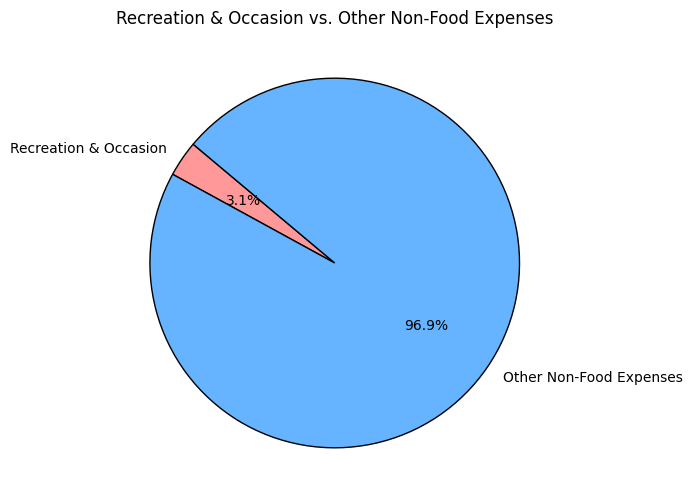

In [21]:
# Calculate total expenses for Recreation + Occasion and Other Non-Food
total_recreation_occasion = final_fies[['RECREATION', 'OCCASION']].sum().sum()
total_nfood = final_fies['NFOOD'].sum()

# Calculate Other Non-Food Expenses
other_nfood_expense = total_nfood - total_recreation_occasion

# Data for the pie chart
labels = ['Recreation & Occasion', 'Other Non-Food Expenses']
sizes = [total_recreation_occasion, other_nfood_expense]
colors = ['#ff9999', '#66b3ff']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Recreation & Occasion vs. Other Non-Food Expenses')
plt.show()

-The pie chart compares the share of Recreation & Occasion expenses against total non-food expenses.

-Recreation & Occasion expenses make up only 3.1%, while Other Non-Food Expenses account for 96.9%.

-This suggests that households allocate a very small portion of their budget to recreation and special occasions compared to other non-food necessities.